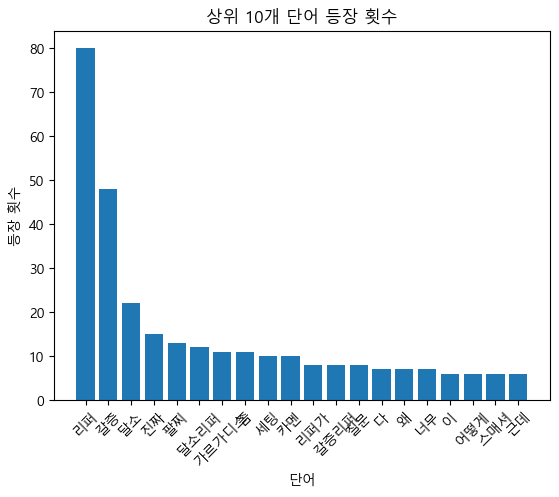

In [23]:
# 이렇게 할시 시간이 너무 오래걸리고 데이터 전처리 과정에서 해야할일들이 너무 많아짐
import requests
import re
from collections import Counter
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

word_count = Counter()

for i in range(10):
    url = "https://www.inven.co.kr/board/lostark/5647?p=" + str(i)  # 크롤링하려는 웹 페이지의 URL
    response = requests.get(url)
    html = response.text

    soup = BeautifulSoup(html, 'html.parser')
    post_list = soup.find_all('td', class_='tit')  # 게시판 글 목록을 감싸는 태그를 선택합니다.

    for post in post_list:
        title_element = post.find('a', class_='subject-link')  # 게시글 제목을 담고 있는 <a> 태그를 선택합니다.
        title = title_element.get_text(strip=True)  # 게시글 제목을 가져옵니다.
        # [ ]로 둘러싸인 부분 삭제
        title = re.sub(r'\[.*?\]', '', title)
        #print(title)
        
        # 단어 토큰화
        words = title.split()

        # 카운터에 단어 등장 횟수 추가
        word_count.update(words)

# 가장 많이 등장한 단어들과 등장 횟수 출력
most_common_words = word_count.most_common(20)  # 상위 10개 단어 선택

# 단어와 등장 횟수를 리스트로 분리
words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

# 그래프 그리기
plt.rc('font', family='Malgun Gothic')
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.xlabel('단어')
plt.ylabel('등장 횟수')
plt.title('상위 10개 단어 등장 횟수')
plt.show()
